In [1]:
import cupy as cp
import numpy as np
import matplotlib.pyplot as plt
from HDF5DatasetGenerator import HDF5DatasetGenerator
import mlflow 
import torch
import torch.nn as nn

In [71]:
generator = HDF5DatasetGenerator('../data/structured/DISP_1_ANGLE_2/c4TrainGenerator.hdf5',int(64e6))
data1 = cp.array(next(generator.generator()))

In [72]:
generator = HDF5DatasetGenerator('../data/structured/DISP_1_ANGLE_3/HDF5/d3TrainGenerator.hdf5',int(64e6))
data2 = cp.array(next(generator.generator()))

In [3]:
import pandas as pd
d = pd.DataFrame(data1.get())

In [8]:
d.describe()

0             1             2             3             4  \
count  5.000000e+06  5.000000e+06  5.000000e+06  5.000000e+06  5.000000e+06   
mean   6.413134e-03 -1.305994e-03 -1.094074e-03 -1.495416e-03 -3.604168e-04   
std    7.200636e-01  1.003133e+00  1.008471e+00  1.005427e+00  1.137812e+00   
min   -7.828707e-01 -3.304610e+00 -3.380215e+00 -6.618908e+00 -7.581525e+00   
25%   -5.233812e-01 -8.627613e-01 -8.600985e-01 -7.111195e-01 -7.870588e-01   
50%   -2.442782e-01 -1.024318e-03 -1.548048e-03 -9.575535e-04  8.457390e-04   
75%    3.067050e-01  8.588421e-01  8.604072e-01  7.066949e-01  7.914344e-01   
max    3.315527e+00  3.305246e+00  3.464712e+00  6.615530e+00  7.642153e+00   

                  5  
count  5.000000e+06  
mean   5.118597e-03  
std    7.430934e-02  
min   -1.989413e+00  
25%    1.024616e-02  
50%    1.673474e-02  
75%    2.341630e-02  
max    3.109307e-02

In [9]:
d.corr()

0         1         2         3         4         5
0  1.000000 -0.001238  0.002851 -0.000716  0.005020  0.107175
1 -0.001238  1.000000  0.000308  0.791195  0.000807 -0.000070
2  0.002851  0.000308  1.000000 -0.000064  0.778309 -0.013477
3 -0.000716  0.791195 -0.000064  1.000000 -0.000735  0.000807
4  0.005020  0.000807  0.778309 -0.000735  1.000000  0.041770
5  0.107175 -0.000070 -0.013477  0.000807  0.041770  1.000000

In [4]:
keys = ['E', 'X', 'Y', 'dX', 'dY', 'dZ']

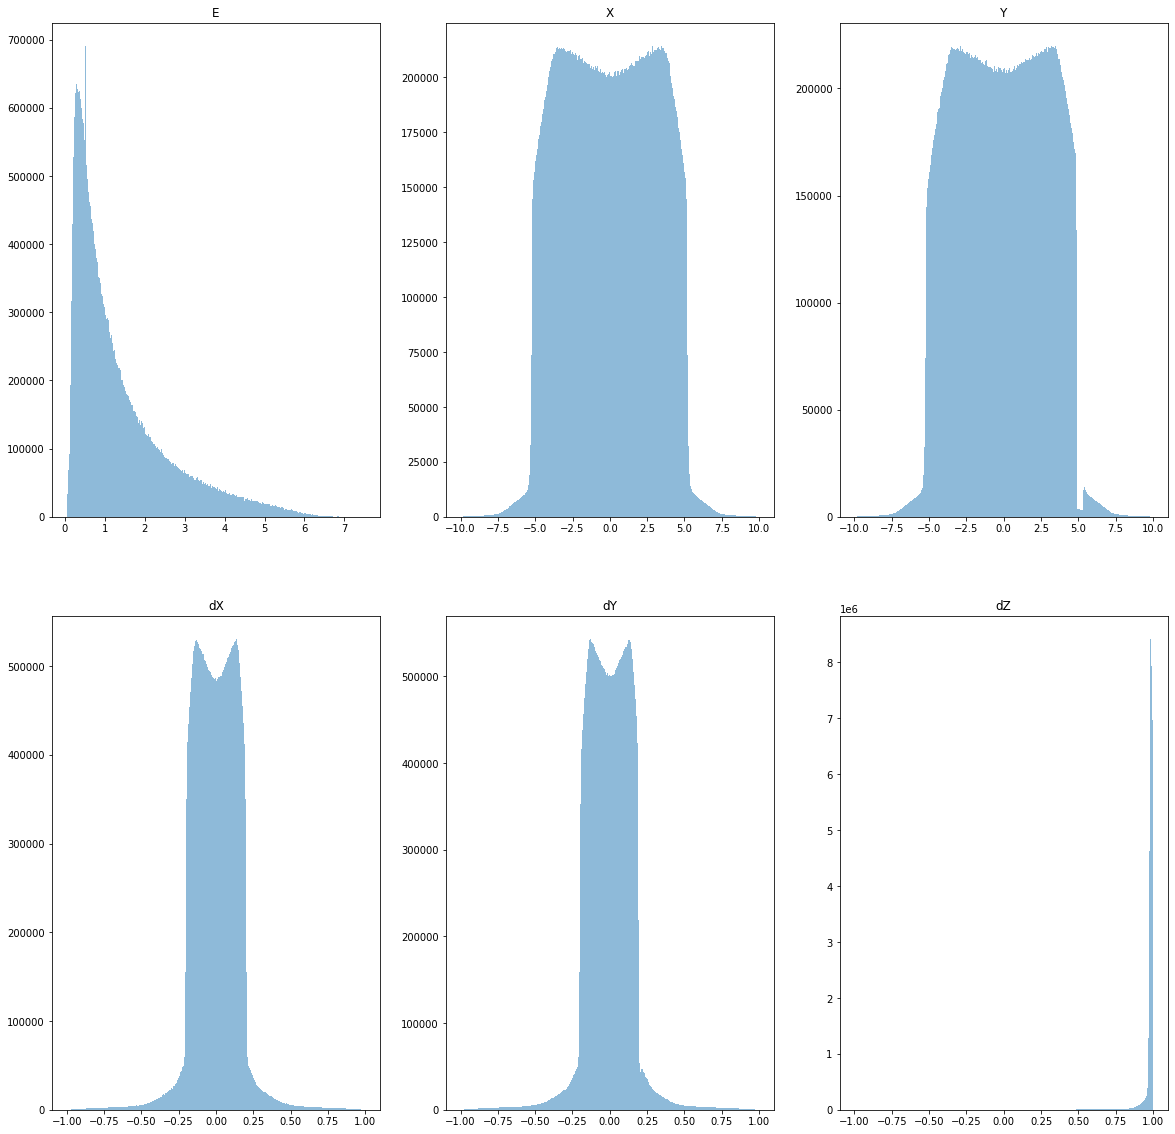

In [64]:
fig, axs = plt.subplots(2, 3)
fig.set_size_inches(20, 20)
for i, j in enumerate(keys):
    axs.flatten()[i].hist(data1[:, i].get(), bins=300, alpha=.5)
    axs.flatten()[i].set_title(j)

(array([  4287.,   4076.,   3717.,   3509.,   4360., 159193.,   4145.,
          4304.,   3536.,   4255.]),
 array([0.51001   , 0.510198  , 0.510386  , 0.510574  , 0.510762  ,
        0.51094997, 0.511138  , 0.511326  , 0.511514  , 0.511702  ,
        0.51189   ], dtype=float32),
 <BarContainer object of 10 artists>)

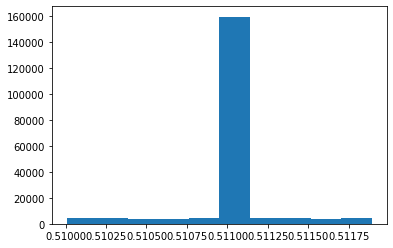

In [65]:
plt.hist(data1[((data1[:,0]<.5119)&(data1[:,0]>.510)).flatten(),0].get(),)

In [66]:
temp = data1[((data1[:,0]<.5119)&(data1[:,0]>.510)).flatten(),0]
temp = cp.unique(temp,return_counts=True)

In [67]:
temp[0][temp[1].argsort()][-1]

array(0.511, dtype=float32)

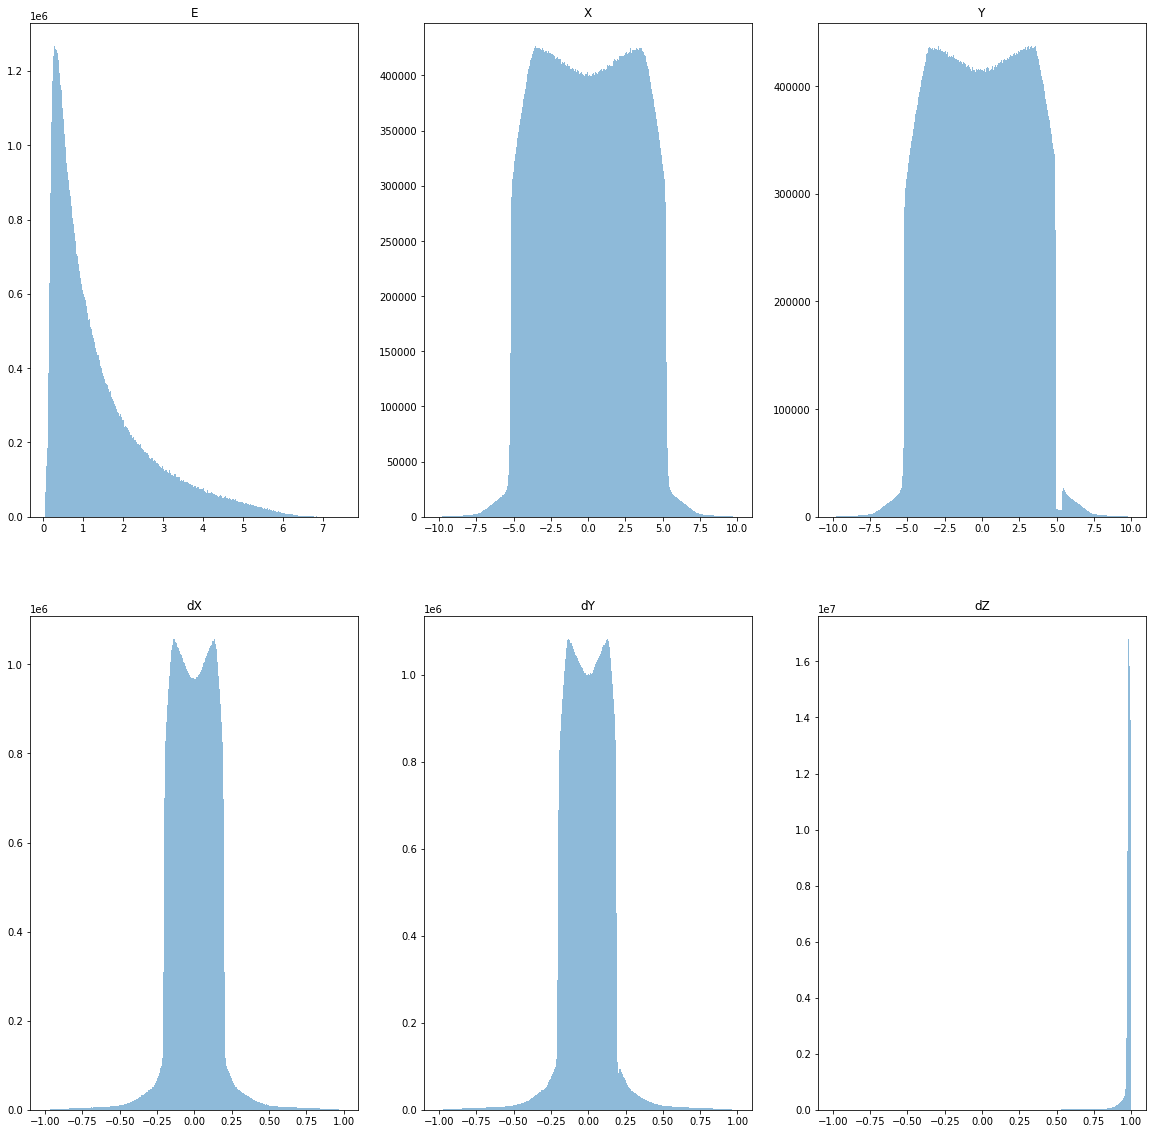

In [73]:
fig, axs = plt.subplots(2, 3)
fig.set_size_inches(20, 20)
mask1 = data1[:,0]!=0.511
for i, j in enumerate(keys):
    axs.flatten()[i].hist(data1[mask1, i].get(), bins=300, alpha=.5)
    axs.flatten()[i].set_title(j)

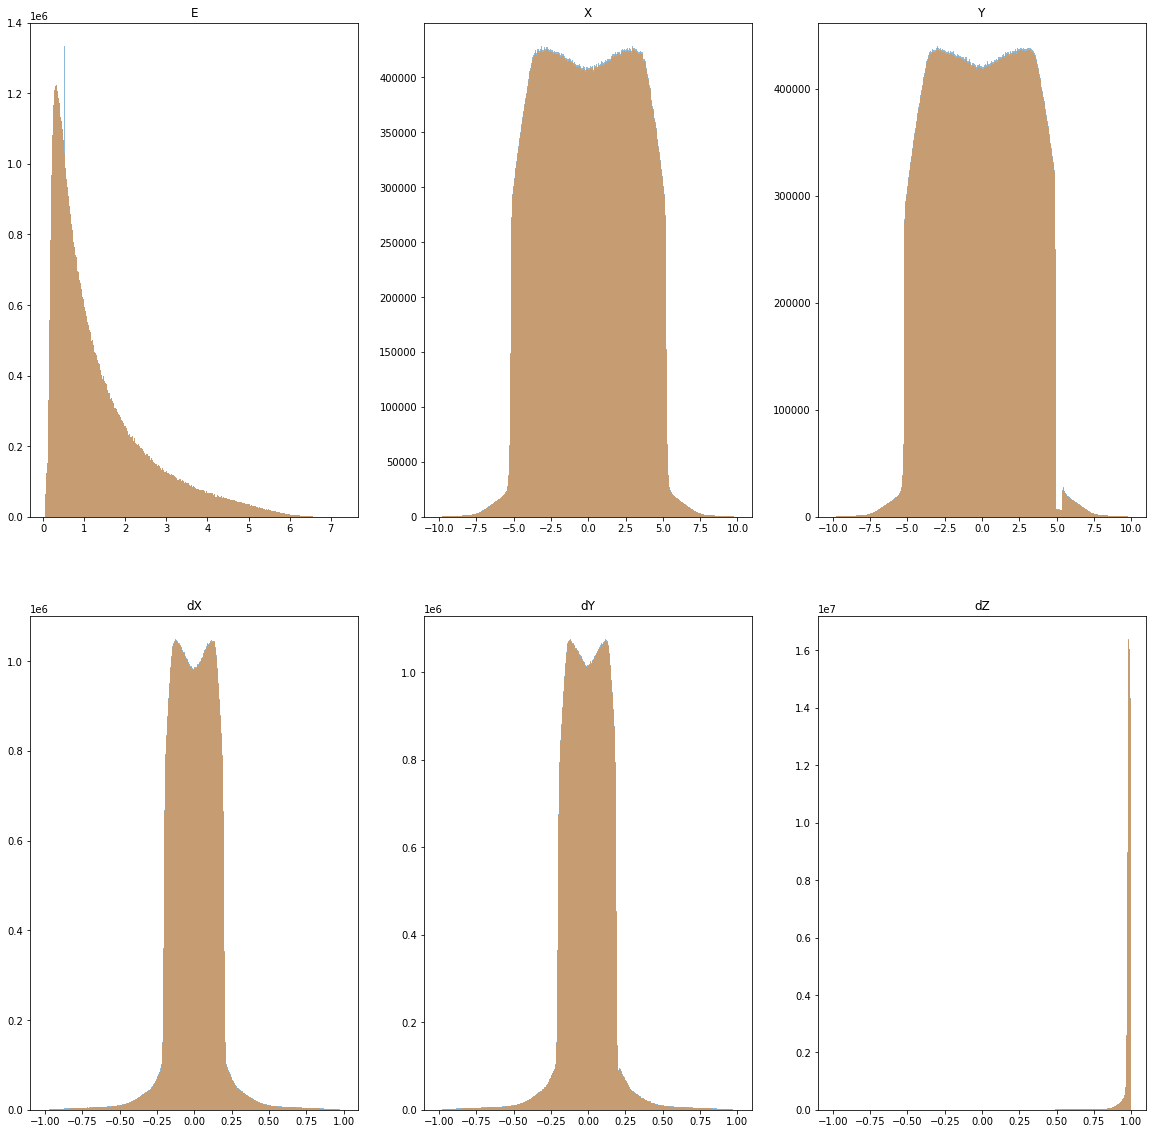

In [74]:
fig, axs = plt.subplots(2, 3)
fig.set_size_inches(20, 20)
mask2 = data2[:,0]!=0.511
for i, j in enumerate(keys):
    axs.flatten()[i].hist(data2[:, i].get(), bins=300, alpha=.5,label='original')
    axs.flatten()[i].set_title(j)
    axs.flatten()[i].hist(data2[mask2, i].get(), bins=300, alpha=.5,label='filtered')
    axs.flatten()[i].set_title(j)

In [75]:
print(f'Percentage of anihilation data1 {1-mask1.sum()/mask1.shape[0]}, data2 {1-mask2.sum()/mask2.shape[0]}')

Percentage of anihilation data1 0.004870421874999975, data2 0.004751359375000042
